In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/archive (3).zip')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Check for missing values
df = df.dropna()

# Scale the Amount column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Separate features and target
X = df.drop(['Class'], axis=1)
y = df['Class']


In [ ]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

def dynamic_feature_selection(X, y, k=10):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(X, y)
    selected_features = selector.get_support(indices=True)
    return X_new, selected_features

# Select top 10 features
X_train_selected, selected_features = dynamic_feature_selection(X_train, y_train, k=10)
X_test_selected = X_test.iloc[:, selected_features]


In [ ]:




from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define a reduced parameter grid
param_grid = {
    'max_depth': [5, 10, None],  # Fewer options
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=3,  # Reduce cross-validation folds to 3
    scoring='accuracy',
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

# Fit the model
grid_search.fit(X_train_selected, y_train)

# Get the best estimator and parameters
best_tree = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the optimized model
y_pred_optimized = best_tree.predict(X_test_selected)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimized))
print("Classification Report:\n", classification_report(y_test, y_pred_optimized))



Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Optimized Accuracy: 0.9994908886626171
Confusion Matrix:
 [[56849    15]
 [   14    84]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.86      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


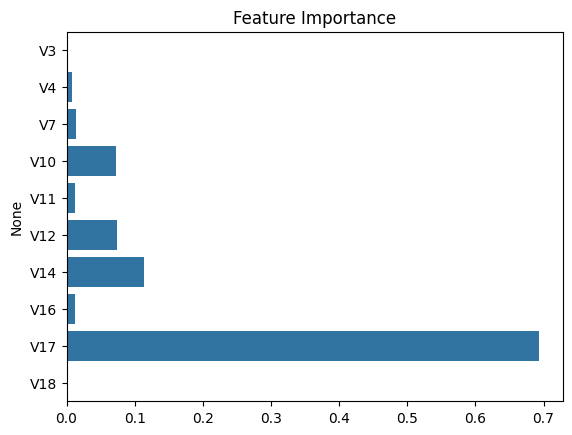

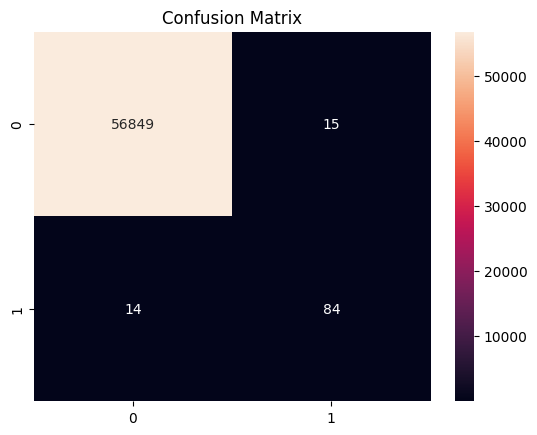

In [ ]:
# Feature importance
importances = best_tree.feature_importances_
sns.barplot(x=importances, y=X.columns[selected_features])
plt.title('Feature Importance')
plt.show()

# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_optimized), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Predict the class for the test data using the best decision tree model
y_pred_optimized = best_tree.predict(X_test_selected)

# Print the predicted class labels for the test data
print("Predicted Classes for the test data:", y_pred_optimized)

# Evaluate the performance of the model on the test data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy score
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimized))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_optimized))


Predicted Classes for the test data: [0 0 0 ... 0 0 0]
Optimized Accuracy: 0.9994908886626171
Confusion Matrix:
 [[56849    15]
 [   14    84]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.86      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
